In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  


In [2]:
from hogares import EncuestaHogares

encuesta = EncuestaHogares("usu_hogar_T324.xlsx", "usu_individual_T324.xlsx")
hogares, personas = encuesta.memoria()
hogares, personas = encuesta.filtrados_por_region(43, hogares, personas)
subconjunto_hogares, subconjunto_personas = encuesta.subconjunto_columnas(hogares, personas)
subconjunto_hogares_personas = encuesta.df_hogares_personas(subconjunto_hogares, subconjunto_personas)

### Edad
Cuantitativa discreta

In [3]:
personas["edad"].describe()

count    14315.000000
mean        37.251764
std         22.394482
min         -1.000000
25%         18.000000
50%         35.000000
75%         55.000000
max        102.000000
Name: edad, dtype: float64

#### Valores Faltantes/Incorrectos
Hay 101 personas con edad -1.

In [44]:
len(personas[(personas["edad"]==-1)])

101

Se evalúa la fecha de nacimiento

/tmp/ipykernel_5705/2544558584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocurrencias_por_anio["año"] = ocurrencias_por_anio["CH05"].apply(lambda dt: dt.year)


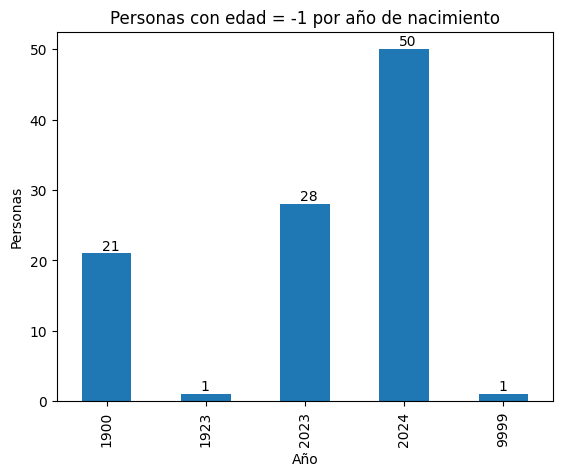

In [93]:
import datetime

ocurrencias_por_anio = personas[personas["edad"]==-1]
ocurrencias_por_anio["año"] = ocurrencias_por_anio["CH05"].apply(lambda dt: dt.year)
ocurrencias_por_anio = ocurrencias_por_anio["año"].value_counts().reset_index(name="frecuencia")
ocurrencias_por_anio.sort_values("año", inplace=True)
ocurrencias_por_anio.head()

axes = ocurrencias_por_anio.plot.bar(x="año", y="frecuencia")
axes.set_xlabel("Año")
axes.set_ylabel("Personas")
axes.set_title("Personas con edad = -1 por año de nacimiento")
for p in axes.patches:
    axes.annotate(str(p.get_height()), (p.get_x()+0.2, p.get_height() +.5))
axes.get_legend().remove()
